In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\ACB.csv')
df

,Date,Close,Open,High,Low,Volume,% Change
0,25/12/2023,"23,350.00","23,250.00","23,450.00","23,200.00","758,000,000.00",0.65%
1,22/12/2023,"23,200.00","23,200.00","23,300.00","23,200.00","451,000,000.00",-0.22%
2,21/12/2023,"23,250.00","23,200.00","23,250.00","23,050.00","708,000,000.00",0.22%
3,20/12/2023,"23,200.00","23,050.00","23,250.00","23,050.00","886,000,000.00",0.65%
4,19/12/2023,"23,050.00","22,800.00","23,100.00","22,800.00","1,147,000,000.00",1.10%
...,...,...,...,...,...,...,...
1486,8/1/2018,"12,004.60","11,615.40","12,004.60","11,615.40","1,296,000,000.00",3.35%
1487,5/1/2018,"11,615.40","11,675.30","11,825.00","11,495.70","2,156,000,000.00",0.00%
1488,4/1/2018,"11,615.40","11,585.50","11,645.30","11,495.70","2,126,000,000.00",0.26%
1489,3/1/2018,"11,585.50","11,615.40","11,705.20","11,375.90","1,689,000,000.00",-0.26%


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [4]:
y_column_name = 'Close'  # Replace with the correct column name
y = df[y_column_name].str.replace(',', '').astype(float).values.reshape(-1, 1)


In [5]:
X = np.arange(len(df)).reshape(-1, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [7]:
model = SVR(kernel='linear')
model.fit(X_train, y_train.ravel())


SVR(kernel='linear')

In [8]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [9]:
future_days = 30
X_future = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
y_future_pred = model.predict(X_future)

In [10]:

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100


In [11]:

print(f'MAE (test): {mae_test:.2f}')


print(f'RMSE (test): {rmse_test:.2f}')

print(f'MAPE (test): {mape_test:.2f}%')

MAE (test): 3221.74
RMSE (test): 3868.59
MAPE (test): 41.49%


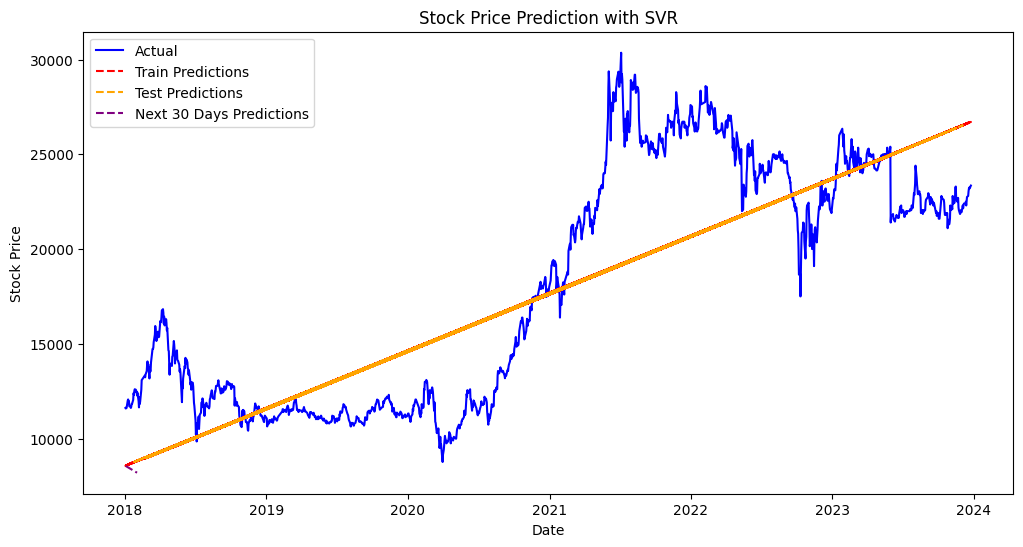

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Actual', color='blue')
plt.plot(df['Date'].iloc[X_train.flatten()], y_train_pred, label='Train Predictions', linestyle='--', color='red')
plt.plot(df['Date'].iloc[X_test.flatten()], y_test_pred, label='Test Predictions', linestyle='--', color='orange')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=future_days+1)[1:], y_future_pred, label='Next 30 Days Predictions', linestyle='--', color='purple')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with SVR')
plt.legend()
plt.show()
